# BY: Mohamed Ashraf Gaber

## The Data

### I'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).
### The data I'm using contains a collection of more than 5 thousand SMS phone messages.

### This Model will predict if the message Spam or Ham.

## Importing libraries.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

## Reading the data.

In [2]:
df = pd.read_csv('SMSSpamCollection', '\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis and Data Visualization.

In [3]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


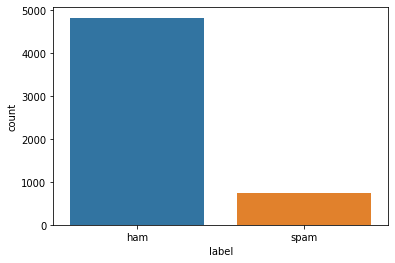

In [5]:
sns.countplot(x='label', data=df)

### Creating a new column that will have the length of each message.

In [6]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


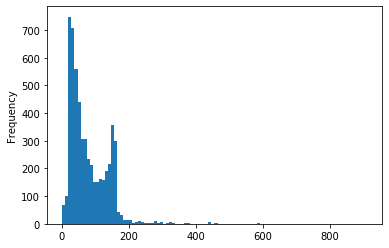

In [7]:
df['length'].plot(kind='hist', bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000110BF39EA08>,
      dtype=object)

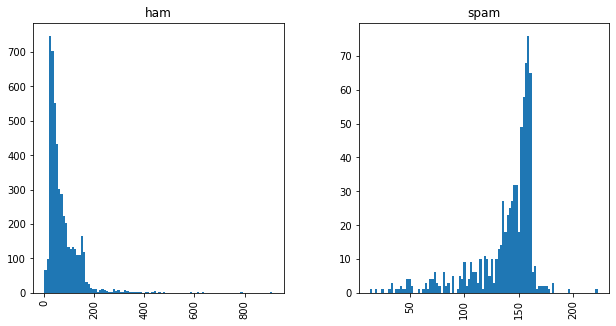

In [8]:
df.hist(column='length', by='label', bins=100, figsize=(10, 5))

## Setting the features to X variable and the label to y variable.

In [9]:
X = df['message']
y = df['label']

## Splitting the data into a training set and testing set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Creating a Data Pipeline

### I will use Pipeline. This will allow us to set up all the transformations that we will do to the data for future use.

In [11]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('model', MultinomialNB())
])

## Fitting the Model.

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## Getting the prediction.

In [13]:
prediction = pipeline.predict(X_test)

## Evaluating the Model.
### And the model has 99% accuracy. Great!

In [14]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[1203    4]
 [  12  174]]


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1207
        spam       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393

